### 1. Importing your libraries and data

In [15]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define Path

path = r'C:\Users\14239\Downloads\Personal'

In [16]:
# Import Data

df = pd.read_csv(os.path.join(path, 'Data_for_time_6_6_again.csv'), index_col = False)

In [17]:
df.head()

Season    AVG HR
0  1920-01-01  5.287234
1  1921-01-01  7.258427
2  1922-01-01  8.033708
3  1923-01-01  7.636364
4  1924-01-01  7.493671

In [18]:
df.shape

(102, 2)

In [19]:
df.columns

Index(['Season', 'AVG HR'], dtype='object')

In [11]:
type(df)

pandas.core.frame.DataFrame

In [20]:
# Set the "Season" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['Season']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['Season'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

AVG HR
datetime            
1920-01-01  5.287234
1921-01-01  7.258427
1922-01-01  8.033708
1923-01-01  7.636364
1924-01-01  7.493671

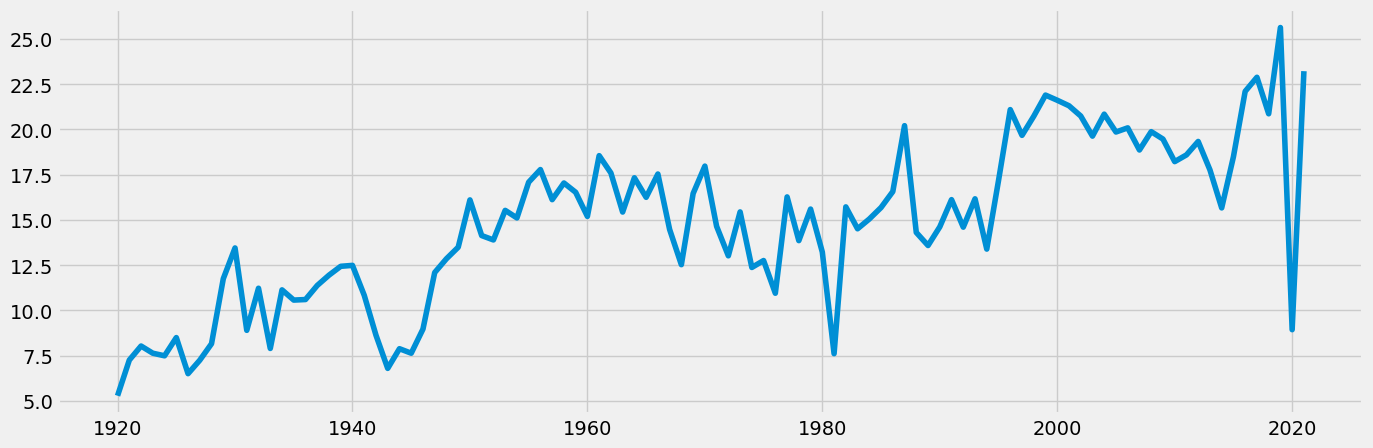

In [21]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

### 3. Time-series analysis: decomposition

In [26]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [27]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

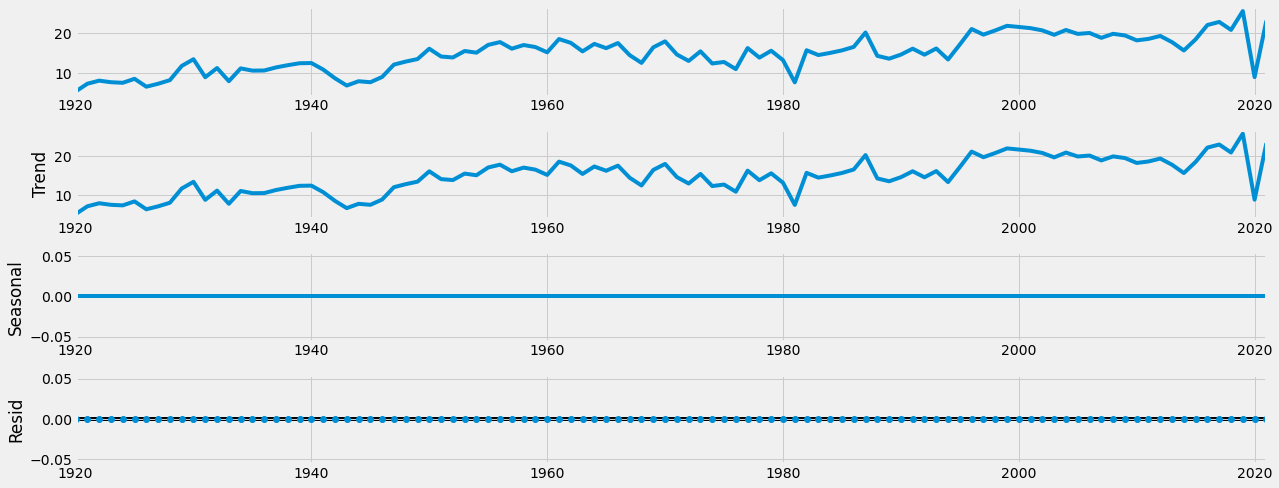

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend and underlying trend appear to be the same, indicating that the data does not need to be smoothed. There is also vertually no seasonality with this data and virtually no unexplained noise.

### 4. Testing for stationarity

In [30]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['AVG HR'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.478938
p-value                          0.120683
Number of Lags Used              1.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


The Test Statistic is larger than the Critical Values, though not by much. However, this means we can't reject the null hypothesis and the data is non-stationary 

### 5. Stationarizing the Data

In [31]:
data_diff = df - df.shift(1) 

In [32]:
# Remove missing amounts

data_diff.dropna(inplace = True)

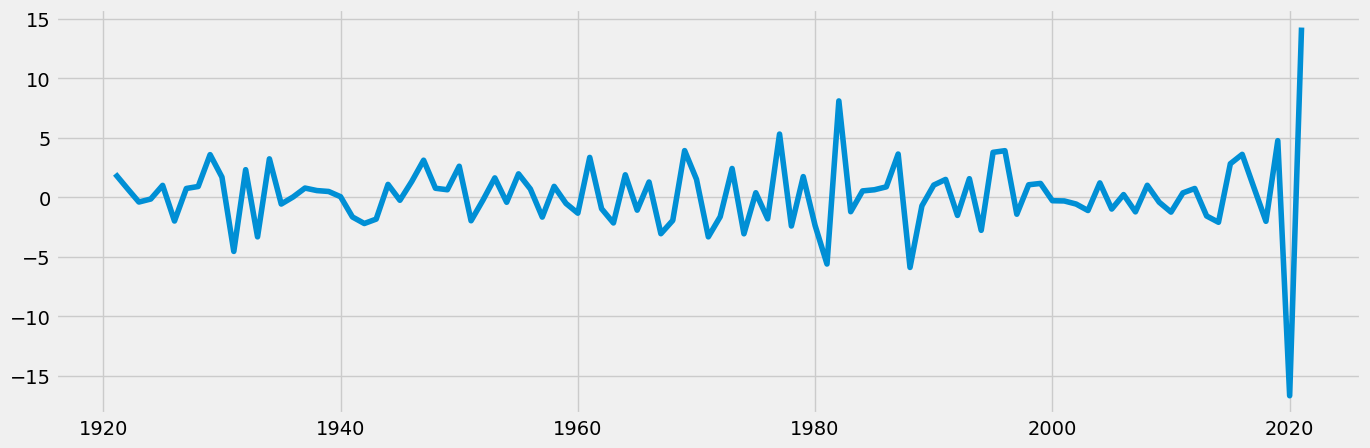

In [33]:
# Changes to time series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.629666e+00
p-value                        1.624944e-16
Number of Lags Used            1.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


Data is now stationary since the Test Statistic is lower than the Critical Values

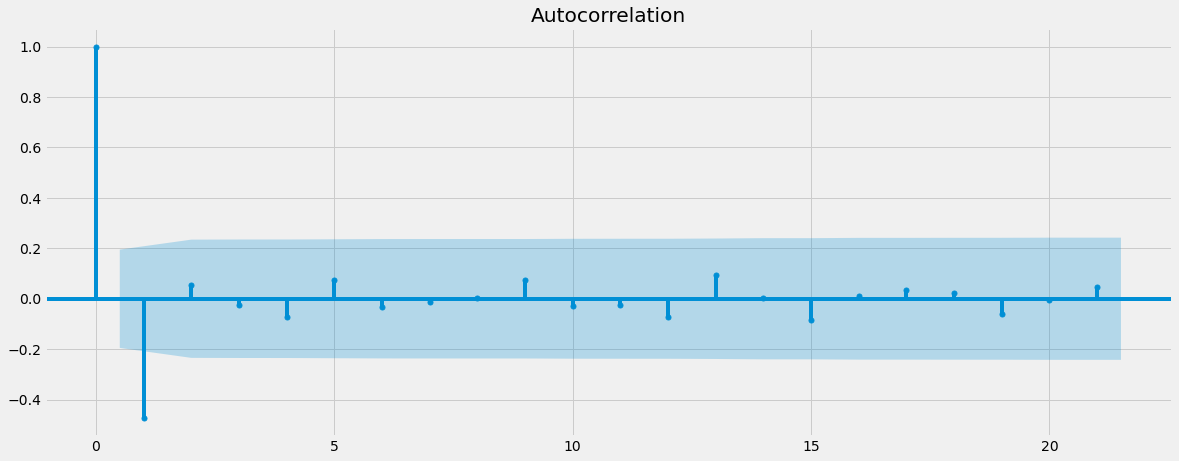

In [36]:
# Check autocorrections
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()